In [30]:
import pandas as pd
import numpy as np

In [86]:
df=pd.read_csv('no_Nan_outliers_yes.csv')

In [87]:
df.shape

(3424, 69)

In [88]:

cat_corr = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)[['Persistency_Flag']]



In [89]:
pd.set_option('display.max_rows', None)

In [90]:
np.abs(cat_corr).sort_values(by=['Persistency_Flag'], ascending=False)

,Persistency_Flag
Persistency_Flag,1.000000
Dexa_During_Rx,0.491823
Dexa_Freq_During_Rx,0.395247
Comorb_Long_Term_Current_Drug_Therapy,0.352760
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,0.322320
Comorb_Encounter_For_Immunization,0.314887
"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",0.289828
Comorb_Other_Disorders_Of_Bone_Density_And_Structure,0.247283
Concom_Systemic_Corticosteroids_Plain,0.242854
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,0.233279


In [38]:
import sweetviz as sv
my_report = sv.analyze(df)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"



Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

#  Hypothesis1 Effects of Demographics on persistency of drugs

<AxesSubplot:xlabel='Age_Bucket', ylabel='count'>

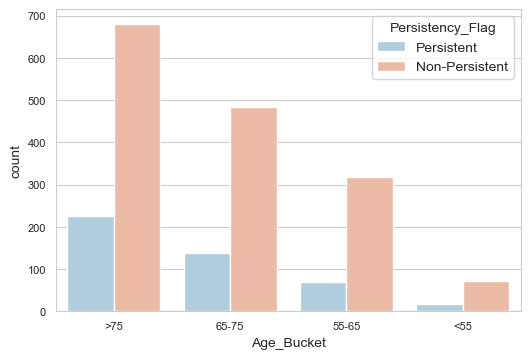

In [65]:
sns.set_style('whitegrid')
sns.countplot(x='Age_Bucket',hue='Persistency_Flag',data=df,palette='RdBu_r')

### Result Older patients are more persistent

<AxesSubplot:xlabel='Region', ylabel='count'>

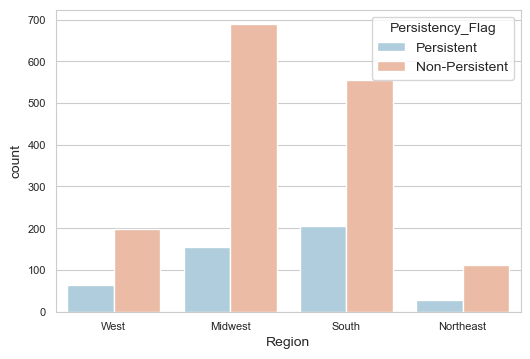

In [67]:
sns.set_style('whitegrid')
sns.countplot(x='Region',hue='Persistency_Flag',data=df,palette='RdBu_r')

### Result : People from south is more Persistent followed by midwest

####  IDNs are large healthcare delivery organizations that either own or manage multiple points of patient care - from hospitals to physician practices to long term care facilities, and everything in between. 

<AxesSubplot:xlabel='Idn_Indicator', ylabel='count'>

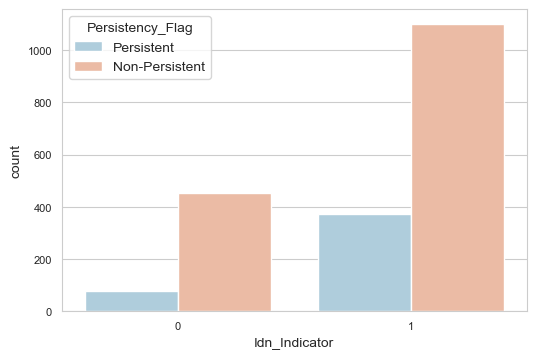

In [75]:
sns.set_style('whitegrid')
sns.countplot(x='Idn_Indicator',hue='Persistency_Flag',data=df,palette='RdBu_r')

### Result: Patients associated with IDN are more persistent as compared to others

## Hypothesis2 Effects of provider attributes on the persistency 

<AxesSubplot:xlabel='Ntm_Speciality', ylabel='count'>

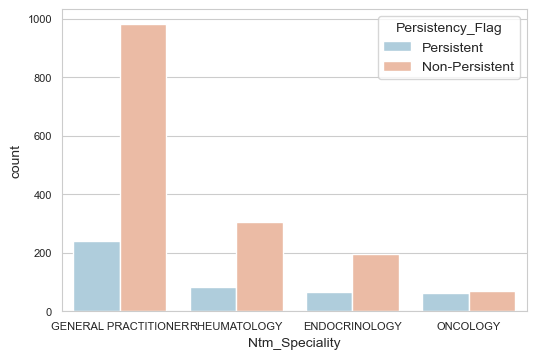

In [80]:
sns.set_style('whitegrid')
sns.countplot(x='Ntm_Speciality',hue='Persistency_Flag',data=df,palette='RdBu_r')

#### Visualizing as percentage

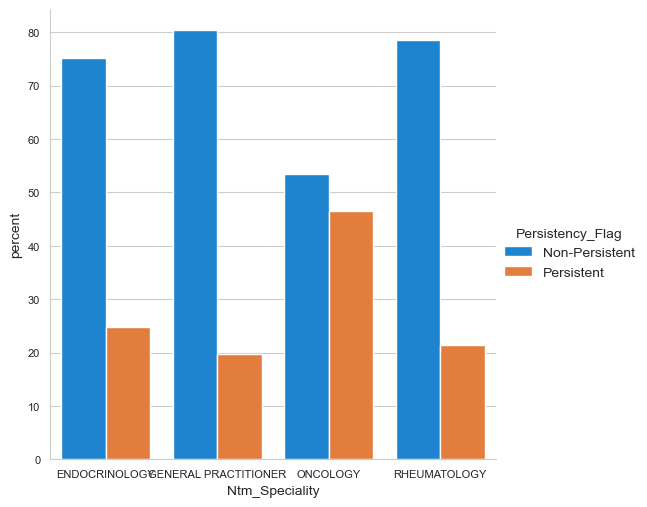

In [81]:
x,y = 'Ntm_Speciality', 'Persistency_Flag'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

### Result 2: Oncology followed by Endocrinology drugs are more persistent
#### In general terms Cancer patients are more persistent in taking medicines followed by diabetes and thyroid patient

### Hypothesis 3: Effects of Glucose record During Rx 

In [ ]:
Gluco_Record_During_Rx,

<AxesSubplot:xlabel='Gluco_Record_During_Rx', ylabel='count'>

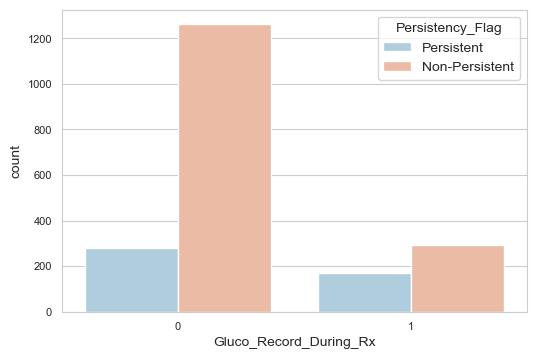

In [83]:
sns.set_style('whitegrid')
sns.countplot(x='Gluco_Record_During_Rx',hue='Persistency_Flag',data=df,palette='RdBu_r')

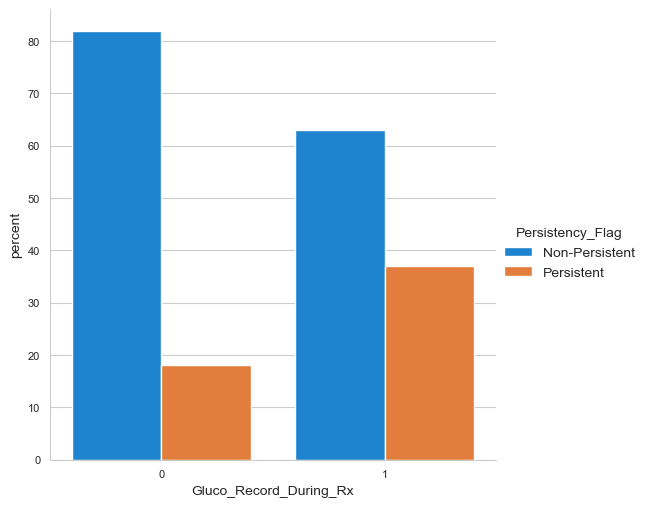

In [84]:
x,y = 'Gluco_Record_During_Rx', 'Persistency_Flag'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

### Result When glucose record is considered during RX persistency increases from 18 to 38 %

## Hypothesis 4 Effects of dexa scan  during Rx

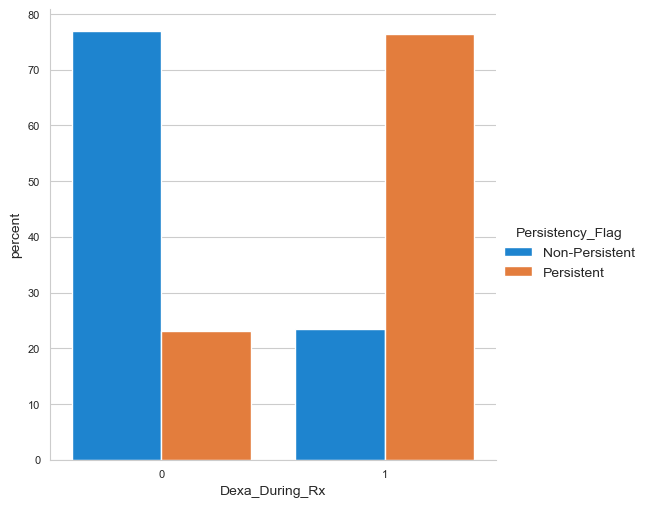

In [93]:
x,y = 'Dexa_During_Rx', 'Persistency_Flag'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

## Result: It clearly shows that if dexa scan is done during Rx persistency increase from 22 % to 77 %